### **Aprendizaje por Refuerzo (Reinforcement Learning)** ###

Paradigma de aprendizaje automático en el que un agente aprende a tomar decisiones secuenciales mediante la interacción con un entorno. En este enfoque, el agente toma acciones en un entorno y recibe retroalimentación en forma de recompensas o castigos, lo que guía su aprendizaje para tomar decisiones que maximicen la recompensa acumulada a lo largo del tiempo.

**Principales conceptos del aprendizaje por refuerzo**:

* Agente: Es la entidad que toma decisiones y realiza acciones en el entorno. Puede ser un programa de computadora, un robot o cualquier sistema capaz de aprender.

* Entorno: Es el contexto en el que el agente opera y toma decisiones. Puede ser el mundo físico, un simulador o cualquier sistema con el que el agente interactúa.

* Acciones: Son las decisiones que el agente puede tomar en un momento dado. Las acciones tienen un impacto en el entorno y afectan las futuras observaciones y recompensas.

* Recompensas: Son señales numéricas que indican la calidad de las acciones tomadas por el agente. El objetivo del agente es maximizar la recompensa acumulada a lo largo del tiempo.

* Política: Es la estrategia o el conjunto de reglas que el agente sigue para seleccionar acciones en diferentes estados del entorno.

* Valor del Estado y de la Acción: Representan la utilidad estimada de un estado o acción en términos de recompensas futuras esperadas.

El aprendizaje por refuerzo se utiliza en una variedad de aplicaciones, como juegos, robótica, control de procesos y toma de decisiones en entornos dinámicos. Los algoritmos de aprendizaje por refuerzo buscan encontrar estrategias óptimas que maximicen la recompensa a largo plazo, incluso en entornos complejos y desconocidos.

**Q Learning:**

Q-Learning es un algoritmo de aprendizaje por refuerzo que se utiliza para aprender una política óptima en entornos discretos y finitos. Este algoritmo se centra en aprender la función de valor de acción (Q) que evalúa la calidad de tomar una acción particular en un estado específico, con el objetivo de maximizar la recompensa acumulada a lo largo del tiempo.

Principales conceptos en Q-Learning:

* Tabla Q (Q-Table): Es una estructura de datos que almacena los valores Q para todas las combinaciones posibles de estados y acciones en el entorno. Inicialmente, la tabla se inicializa con valores arbitrarios o a cero.

* Valor Q (Q-Value): Representa la calidad estimada de tomar una acción específica en un estado particular. Se actualiza a medida que el agente interactúa con el entorno y recibe retroalimentación en forma de recompensas.

* Recompensa (Reward): Es la señal numérica que el agente recibe del entorno después de tomar una acción en un estado. La recompensa influye en la actualización de los valores Q.

* Exploración vs. Explotación (α): Q-Learning equilibra la exploración (probar nuevas acciones) con la explotación (seleccionar acciones conocidas y con altos valores Q) para descubrir y aprovechar estrategias óptimas.

* Factor de Descuento (γ) (Discount Factor) : Es un parámetro que determina la importancia relativa de las recompensas inmediatas frente a las futuras. Un valor cercano a 1 da más peso a las recompensas futuras.

El algoritmo Q-Learning sigue un proceso iterativo donde el agente realiza acciones, actualiza los valores Q en la tabla Q, y ajusta su política para maximizar las recompensas acumuladas.

Q-Learning es especialmente efectivo en entornos discretos, como juegos de tablero o problemas de control con un número finito de estados y acciones posibles. Sin embargo, su eficacia puede disminuir en entornos más grandes o continuos, donde el uso de métodos más avanzados, como Deep Q-Learning, puede ser más apropiado.

**Actualización de Valores Q:**

La fórmula para actualizar la Tabla Q tras cada acción es:

Q[estado,acción] = Q[estado,acción] + α * (reward + γ * max(Q[nuevoEstado,:]) - Q[estado,acción])

A continuación vamos a ver un ejemplo en el que utilizaremos el algoritmo Q-Learning para entrenar a un Agente. Para hacerlo, vamos a utilizar un entorno de [Open AI Gym](https://openai.com/research/openai-gym-beta).

**Módulos:**

In [1]:
import gym

**Carga de un Entorno:**

In [ ]:
env = gym.make('FrozenLake-v1')

In [ ]:
env = gym.make('FrozenLake-v1', render_mode = 'human')

Podemos obtener información sobre el entorno mediante los siguientes comandos.

In [ ]:
print(env.observation_space.n) # Número de Estados
print(env.action_space.n)      # Número de Acciones

In [5]:
env.reset() # Reinicializa el entono

0

In [ ]:
action = env.action_space.sample() # Devuelve una Acción al azar
print(action)

In [ ]:
new_state, reward, done, info = env.step(action) # Ejecuta la acción dada
print('Nuevo Estado:',new_state, '| Premio:', reward, '| Finalizado:', done, '| Info:', info)

In [ ]:
env.render() # Renderiza la interfaz gráfica de usuario para el entorno
# Ejemplo
# SFFF
# FHFH
# FFFH
# HFFG

**Entorno del Lago Helado:**

El objetivo del Agente es navegar por el Lago Helado y encontrar la salida sin caer a través del hielo.

Hay...

* 16 estados
* 4 acciones posibles (IZQ, DCHA, ARRIBA, ABAJO)
* 4 tipos distintos de bloques (F: Helado, H: Agujero, S: Inicio, G: Final)

**Construir la TablaQ:**

Lo primero que debemos hacer es construir una TablaQ vacía para almacenar y actualizar los Valores Q.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS)) # Creamos una matriz de 0s
Q

Hay que definir algunas constantes que nos servirán para actualizar la TablaQ e indicar a nuestro Agente cuando dejar de entrenar.

In [3]:
EPISODES = 2000 # Número de veces que se ejecutará el entorno desde el inicio
MAX_STEPS = 100 # Número máximo de pasos permitidos en cada ejecución

LEARNING_RATE = 0.81 # Tasa de Aprendizaje (α)
DISCOUNT_FACTOR = 0.96 # Factor de Descuento (γ)

**Selección de Acción:**

Podemos utilizar dos métodos para escoger una acción:
* Escoger una opción válida al azar.
* Usar la TablaQ para encontrar la mejor acción.

Vamos a definir un nuevo valor
Ɛ que nos indica la probabilidad de seleccionar una acción al azar. Este valor será inicialmente muy elevado e irá disminuyendo al incrementar el conocimiento del agente sobre el entorno.

In [4]:
epsilon = 0.9 # Comenzamos con un 90% de probabilidad de escoger una acción al azar

# Método para escoger una Acción
if np.random.uniform(0, 1) < epsilon: # Tomamos un valor al azar (0 o 1) y si es menor que epsilon...
  action = env.action_space.sample()  # Tomamos una Acción al azar
else:
  action = np.argmax(Q[state, :])     # Usamos la TablaQ para escoger la mejor Acción posible basada en los valores actuales

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Actualización de la TablaQ:**

Fórmula:
Q[estado,acción] = Q[estado,acción] + α * (reward + γ * max(Q[nuevoEstado,:]) - Q[estado,acción])

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q[new_state, :]) -Q[state, action])

**Creación del Algoritmo de Q Learning:**

In [23]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS)) # Creamos una matriz de 0s

EPISODES = 20000 # Número de veces que se ejecutará el entorno desde el inicio
MAX_STEPS = 100  # Número máximo de pasos permitidos en cada ejecución

LEARNING_RATE = 0.81 # Tasa de Aprendizaje (α)
DISCOUNT_FACTOR = 0.96 # Factor de Descuento (γ)

RENDER = False # Si quiero ver el entrenamiento hay que ponerlo a True

epsilon = 0.9 # Comenzamos con un 90% de probabilidad de escoger una acción al azar

In [24]:
rewards = []
for episode in range(EPISODES):

  state = env.reset() # Reseteamos el entorno
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    # Método para escoger una Acción
    if np.random.uniform(0, 1) < epsilon: # Tomamos un valor al azar (0 o 1) y si es menor que epsilon...
      action = env.action_space.sample()  # Tomamos una Acción al azar
    else:
      action = np.argmax(Q[state, :])     # Usamos la TablaQ para escoger la mejor Acción posible basada en los valores actuales

    next_state, reward, done, info = env.step(action) # Ejecuta la acción dada --> 'Nuevo Estado:',new_state, '| Premio:', reward, '| Finalizado:', done, '| Info:', info

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.002
      break # Juego Completado con Éxito

print(Q)
print(f'Premio Medio: {sum(rewards)/len(rewards)}:')


[[1.36199010e-01 8.78808748e-03 9.04275113e-03 8.56409867e-03]
 [5.15386581e-03 4.68178098e-03 4.35990820e-03 1.86733132e-01]
 [1.84935170e-03 3.27105645e-03 1.05826179e-03 1.46437891e-01]
 [8.13081846e-04 3.83189013e-03 9.23330539e-04 9.34386325e-02]
 [2.16259330e-01 5.04004474e-03 2.90483484e-03 2.42126165e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.35536746e-07 6.41735611e-07 1.82111847e-03 2.37935890e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.67410403e-03 4.19761327e-03 4.29739827e-03 4.30355786e-01]
 [1.80627046e-03 2.04622454e-01 2.42262673e-03 1.06489551e-03]
 [7.96958572e-01 3.40323227e-04 5.01024510e-04 5.93820787e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.38632836e-02 2.14643306e-02 7.31514669e-01 1.03645065e-02]
 [1.00421917e-01 9.85737025e-01 1.11628877e-01 6.55548812e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

Podemos visualizar el progreso de aprendizaje y cómo el Agente ha ido mejorando.

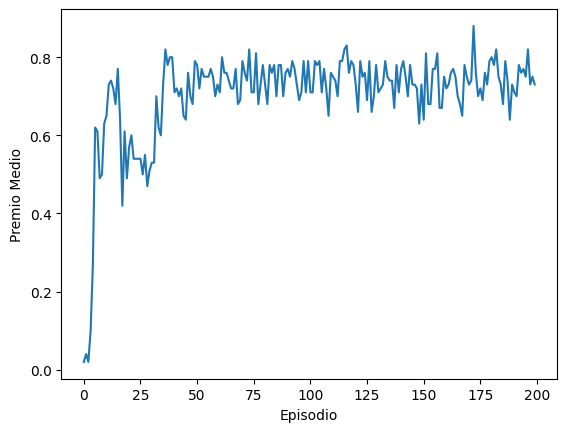

In [25]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range (0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('Premio Medio')
plt.xlabel('Episodio')
plt.show()